## Simulate (and fit) data

You want to test some new modeling strategy, but you didn't collect enough data yet. A good approach is then to try generate an artificial dataset with more or less the same characteristics. Here we are going to try generate a dataset of noisy oscillations, practicing numpy arrays and numpy functionalities.

- The data we want to simulate consist of $N_c$ channels. Each channels it's a timecourse consisting of $N_t$ timepoints. The signal in each channel should be a sinusoidal signal with given frequency $\omega$ and random phase $\phi_c$ (uniformly distributed in [$0,2\pi$]. Then, each channel will have some gaussian noise (normally distributed random numbers) $n_c(t)$. The overall signal should then be
$s_c(t) = sin(\omega t + \phi_c) + \alpha_c n_c(t)$.

<b>Tips:</b>
- Start simple. Start with one channel and few timepoints, so that you can visualize your arrays. Keep the $N_c$ and $N_t$ parameters as variables, so that you can just change their value to increase the size of your dataset.

<b>Bonuses:</b>
- Fit the points and retrieve the phases of each sinusoidal signal. You can do this with a function from scipy called curve fit. To import it write ```from scipy.optimize import curve_fit```? in your code. You can then check the documentation (with the ?, or online) to see how to use it. You will need to define a fit function, this would be a normal python function that describes the data, e.g.,
```
def my_fit_function(x_data,param1,param2):
    
    return param1*np.sin(param2*x_data .....
```
Make sure your function has enough parameters to describe your data

In [1]:
import numpy as np

## Easier / less elegant way

In [27]:
N_channels = 5
N_timepoints = 100
dt = 0.01
alpha = 0.3

In [28]:
# For one channel

t = np.arange(0,N_timepoints)*dt # Time axis
freq = 1. # One frequency
phase = np.random.uniform(0,2*np.pi) # One random phase for each channel
noise = np.random.normal(0,alpha,N_timepoints) # One random noise for each timepoint 

data = np.sin(freq * t + phase) + noise

data.shape

(100,)

In [29]:
# For multiple channels

In [30]:
channel_data = []

for c in range(N_channels):

    t = np.arange(0,N_timepoints)*dt # Time axis
    freq = 1. # One frequency
    phase = np.random.uniform(0,2*np.pi) # One random phase for each channel
    noise = np.random.normal(0,alpha,N_timepoints) # One random noise for each timepoint 

    data = np.sin(freq * t + phase) + noise
    
    channel_data.append(data)
    
channel_data = np.array(channel_data)

In [31]:
channel_data

array([[-4.14776828e-01, -5.50287889e-01,  4.72089948e-02,
        -1.28360388e-01, -4.45830092e-02, -4.00473316e-01,
         1.48111648e-01, -2.04268204e-01, -1.74311644e-01,
        -5.23721369e-02,  8.84858717e-02, -5.95803634e-01,
        -4.19613334e-02, -8.01090360e-02,  5.54429147e-01,
         2.72527786e-01,  3.87116487e-01,  3.33474530e-01,
        -1.64584934e-03,  3.96887579e-01,  1.78620091e-01,
        -6.03485118e-01,  5.32740403e-01,  9.51346692e-02,
        -2.61042784e-01,  2.11942896e-01,  2.02980185e-01,
         2.65537515e-01,  2.18189682e-02,  3.89967812e-01,
        -3.49327525e-02,  5.23860268e-01,  2.74021721e-01,
         2.85802411e-01,  5.75379466e-01,  2.23052131e-01,
        -3.55613498e-02,  3.72546673e-01,  2.01553092e-01,
         5.24845918e-01,  3.88398882e-01,  6.98958777e-01,
         3.67406188e-01, -1.97740762e-01,  2.97910576e-02,
         4.43606672e-02,  7.35416833e-01,  3.16732417e-01,
         7.21226360e-01,  3.50051583e-01,  1.96173287e-0

## More advanced / elegant way

In [57]:
N_channels = 2
N_timepoints = 500
dt = 0.1
alpha = 0.2

In [58]:
t = np.arange(0,N_timepoints)*dt # Time axis
freq = 1. # One frequency, equal to 1 for simplicity
phase = np.random.uniform(0,2*np.pi,N_channels) # One random phase for each channel
noise = np.random.normal(0,alpha,(N_channels,N_timepoints)) # One random noise for each timepoint per channel

channel_data = np.sin((freq * t)[None,:] + phase[:,None]) + noise

Here we are combining arrays with different dimensions: t has N_timepoints elements, whereas phase has N_channels elements. we know that for each channel we need only one phase value, with ```None``` we are asking python to repeat this same value for each timepoint. The same goes for the time, the time axis is the same for each channel, ```None``` repeats it for us.

In [59]:
channel_data.shape

(2, 500)

### Fitting

In [60]:
from scipy.optimize import curve_fit

In [61]:
def fit_function(x,phase,freq,ampl,bias):
    
    return ampl*np.sin(x*freq + phase) + bias

In [62]:
?curve_fit

In [63]:
ch = 0

parameters, correlation_matrix = curve_fit(fit_function,t,channel_data[ch])

Phase was the first parameter, e.g., ```parameters[0]```

In [64]:
print('the phase for channel {} is {}'.format(ch,parameters[0]%(2*np.pi)))

the phase for channel 0 is 2.132571756299363


If we want to do it for every channel

In [65]:
for ch in range(N_channels):
    parameters, correlation_matrix = curve_fit(fit_function,t,channel_data[ch])
    print('the phase for channel {} is {}'.format(
        ch,parameters[0]%(2*np.pi)))

the phase for channel 0 is 2.132571756299363
the phase for channel 1 is 1.3002239068296078


In [66]:
phase

array([5.28263449, 1.29869261])

### Tomorrow spoiler: plottting

In [67]:
import matplotlib.pyplot as plt

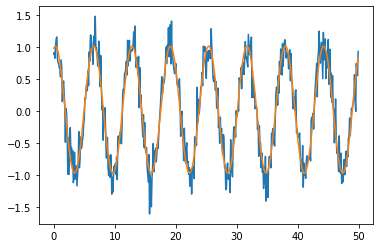

In [68]:
plt.plot(t,channel_data[ch])
plt.plot(t,fit_function(t,parameters[0],parameters[1],parameters[2],parameters[3]))